# Import

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from imblearn.over_sampling import KMeansSMOTE, SVMSMOTE
from sklearn.decomposition import PCA
from tensorflow.keras import Sequential, layers, regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.inspection import permutation_importance

# load data

In [2]:
path = "../data/IITG.AI HACKATHON 1 2021-22/train.csv"
df = pd.read_csv(path)
df.head()

/Users/maximedupouy/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (74) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,major,race_arab,race_asian,race_black,race_white,race_hispanic,race_nativeam,race_nativeau,race_other,nerdy
0,811406,4,5,5,4,5,4,5,3,4,...,NaN,0,0,0,1,0,0,0,0,6
1,248038,4,3,3,2,5,3,3,5,4,...,NaN,0,1,0,0,0,0,0,0,4
2,847531,5,5,5,5,5,5,5,5,4,...,Buisiness Studies,Art,Geography,Biology,G,0,0,0,1,0
3,708422,1,1,3,1,4,4,5,1,3,...,economics,0,0,0,1,0,0,0,0,4
4,269597,5,1,2,5,4,2,4,4,3,...,Currently attending programming,0,0,0,1,0,0,0,0,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15135 entries, 0 to 15134
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             15135 non-null  int64 
 1   Q1             15135 non-null  int64 
 2   Q2             15135 non-null  int64 
 3   Q3             15135 non-null  int64 
 4   Q4             15135 non-null  int64 
 5   Q5             15135 non-null  int64 
 6   Q6             15135 non-null  int64 
 7   Q7             15135 non-null  int64 
 8   Q8             15135 non-null  int64 
 9   Q9             15135 non-null  int64 
 10  Q10            15135 non-null  int64 
 11  Q11            15135 non-null  int64 
 12  Q12            15135 non-null  int64 
 13  Q13            15135 non-null  int64 
 14  Q14            15135 non-null  int64 
 15  Q15            15135 non-null  int64 
 16  Q16            15135 non-null  int64 
 17  Q17            15135 non-null  int64 
 18  Q18            15135 non-n

<AxesSubplot:xlabel='nerdy', ylabel='Count'>

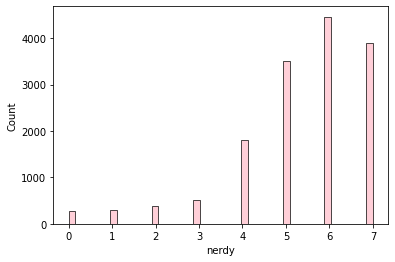

In [4]:
sns.histplot(df['nerdy'], color='pink')

# data explo/cleaning

In [5]:
df.shape

(15135, 80)

In [6]:
columns = df.columns
columns

Index(['id', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'country', 'introelapse',
       'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'screenw', 'screenh', 'hand',
       'religion', 'orientation', 'voted', 'married', 'familysize', 'major',
       'race_arab', 'race_asian', 'race_black', 'race_white', 'race_hispanic',
       'race_nativeam', 'race_nativeau', 'race_other', 'nerdy'],
      dtype='object')

## race questions

In [7]:
df_race = df[columns[71:75]]
df_race

,race_arab,race_asian,race_black,race_white
0,0,0,0,1
1,0,1,0,0
2,Art,Geography,Biology,G
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
15130,0,0,0,0
15131,0,0,0,1
15132,0,0,0,1
15133,0,0,0,1


In [8]:
columns_race = df_race.columns

In [9]:
def del_word(value):
    if value == "0" or value =="1":
        value = int(value)
    else:
        value = 0
    return value

In [10]:
for column in columns_race:
    df[column] = df[column].apply(del_word)

<AxesSubplot:>

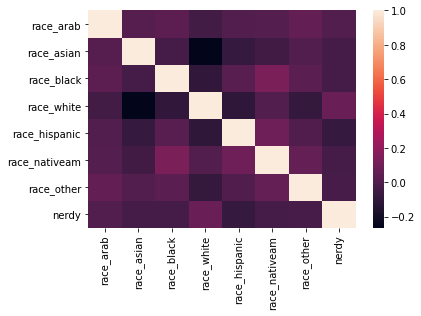

In [12]:
df_race_ = df[['race_arab','race_asian','race_black', 'race_white','race_hispanic','race_nativeam','race_other','nerdy' ]]
sns.heatmap((df_race_).corr())

In [13]:
df_race_.describe()

,race_arab,race_asian,race_black,race_white,race_hispanic,race_nativeam,race_other,nerdy
count,15135.000000,15135.000000,15135.000000,15135.000000,15135.000000,15135.000000,15135.000000,15135.000000
mean,0.018897,0.152560,0.048167,0.400198,0.106178,0.040106,0.072811,5.377800
std,0.136164,0.359575,0.214125,0.489955,0.308075,0.196214,0.259835,1.559145
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


## major :

In [14]:
df = df.drop(columns='major')

In [15]:
df.dropna(inplace=True)

## Q questions

In [16]:
df_Q = df[columns[1:27]]
q_columns = df_Q.columns

In [17]:
for column in q_columns :
    print(df_Q[column].unique())

[4 5 1 3 2 0]
[5 3 1 4 2 0]
[5 3 2 4 1 0]
[4 2 5 1 3 0]
[5 4 3 2 1 0]
[4 3 5 2 1 0]
[5 3 4 1 2 0]
[3 5 1 4 2 0]
[4 3 2 5 1 0]
[3 5 2 1 4 0]
[3 1 5 4 2 0]
[4 1 5 3 2 0]
[5 3 2 4 1 0]
[5 3 2 4 1 0]
[5 3 1 2 4 0]
[5 2 4 1 3 0]
[5 3 4 1 2 0]
[4 3 5 1 2 0]
[5 4 1 2 3 0]
[5 3 2 4 1 0]
[1 3 4 5 2 0]
[2 3 1 5 0 4]
[5 4 1 2 3 0]
[4 5 3 2 1 0]
[3 1 4 2 5 0]
[4 3 5 1 2 0]


In [18]:
for column in q_columns:
    df[column] = df[column].replace(0, df_Q[column].mean())

In [19]:
df['Q1'].unique()

array([4.        , 5.        , 1.        , 3.        , 2.        ,
       3.96167316])

In [20]:
q_columns =['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'nerdy']
df_Q = df[q_columns]

<AxesSubplot:>

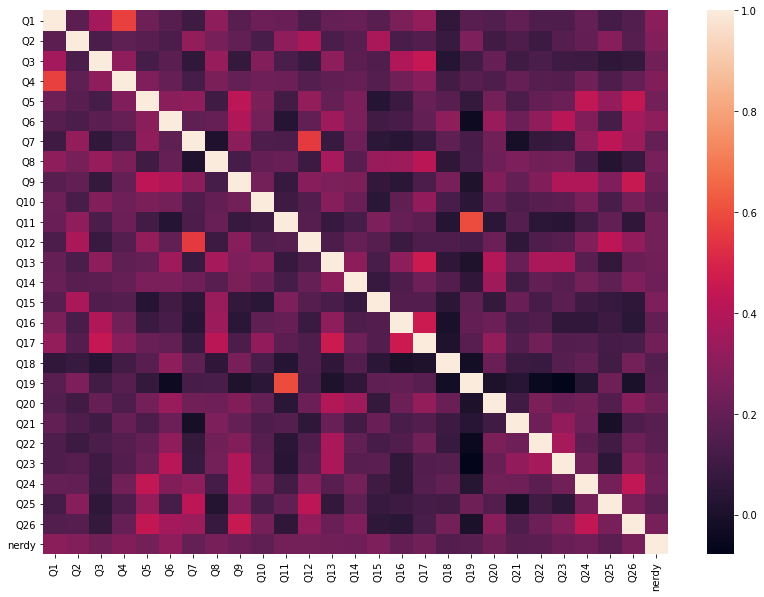

In [21]:
plt.figure(figsize=(14,10))
sns.heatmap(df_Q.corr())

## country

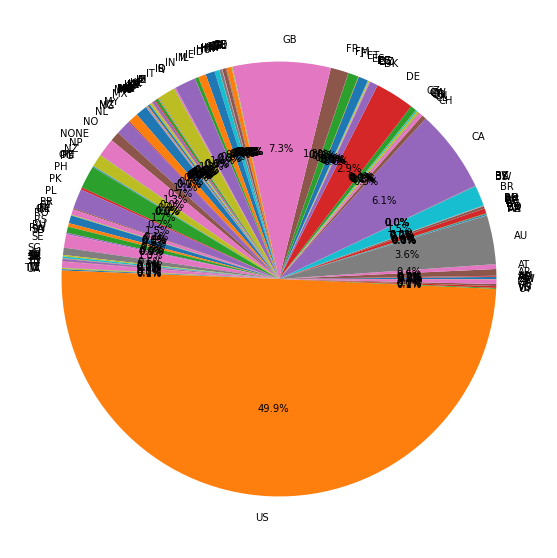

In [22]:
df_country = df['country']
labels, frequencies = np.unique(df_country.values, return_counts = True)
plt.figure(figsize = (10,10))
plt.pie(frequencies,labels = labels, autopct = '%1.1f%%')
plt.show()

In [23]:
len(df_country.unique())

139

Je pars sur enlever cette colonne

In [24]:
df = df.drop(columns='country')

## introelapse		testelapse		surveyelapse

Je pars sur virer ces colonnes

In [25]:
df = df.drop(columns=['introelapse', 'testelapse', 'surveyelapse' ])

## TIPI questions

In [26]:
tipi_columns= columns[31:41]
tipi_columns

Index(['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8',
       'TIPI9', 'TIPI10'],
      dtype='object')

In [27]:
df_tipi = df[tipi_columns]
for column in tipi_columns:
    df[column] = df[column].replace(0, df[column].mean())

<AxesSubplot:>

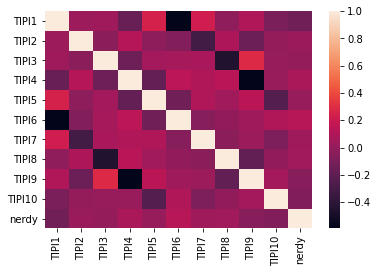

In [28]:
tipi_columns = ['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8',
       'TIPI9', 'TIPI10', 'nerdy']
df_tipi_ = df[tipi_columns]
sns.heatmap(df_tipi_.corr())

## definition question

In [29]:
def_columns = columns[41:57]
def_columns

Index(['VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9',
       'VCL10', 'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16'],
      dtype='object')

In [30]:
def_df = df[def_columns]
def_df.nunique()

VCL1     2
VCL2     2
VCL3     2
VCL4     2
VCL5     2
VCL6     2
VCL7     2
VCL8     2
VCL9     2
VCL10    2
VCL11    2
VCL12    2
VCL13    2
VCL14    2
VCL15    2
VCL16    2
dtype: int64

## eduction

In [31]:
df_col = df[['education', 'urban', 'gender', 'engnat', 'hand', 'religion', 'orientation', 'voted', 'married', 'familysize']]
col__ = ['education', 'urban', 'gender', 'engnat', 'hand', 'religion', 'orientation', 'voted', 'married', 'familysize']
      

In [32]:
def max_value(value, col):
    if value >10:
        value=df[col].mean()
    return value

In [33]:
for col in col__ :
    df[col] = df[col].apply(lambda x : max_value(x, col))
    print(col)
    print(df[col].max())
    df[col] = df[col].replace(0, df[col].mean())

education
4
urban
3
gender
3
engnat
2
hand
3
religion
10.0
orientation
5
voted
2
married
3
familysize
2642.2563272318775


In [34]:
df['familysize'].unique()

array([3.00000000e+00, 2.00000000e+00, 1.00000000e+00, 5.00000000e+00,
       4.00000000e+00, 6.00000000e+00, 7.00000000e+00, 9.00000000e+00,
       6.47048804e+00, 2.64225633e+03, 8.00000000e+00, 1.00000000e+01])

In [35]:
mean_age = np.mean(df['age'][df['age'] < 100])
mean_age
def set_age(value):
    if value>100 and value<1930 :
        value = mean_age
    elif value >=1930 and value<2020:
        value = 2020-value
    elif value>2020:
        value = mean_age
    return value

In [36]:
df['age'] = df['age'].apply(set_age)

<AxesSubplot:xlabel='age', ylabel='Count'>

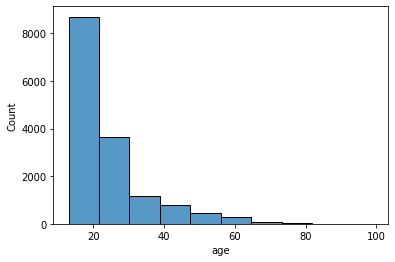

In [37]:
sns.histplot(df['age'],bins=10)

In [38]:
df.describe()

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,familysize,race_arab,race_asian,race_black,race_white,race_hispanic,race_nativeam,race_nativeau,race_other,nerdy
count,15133.000000,15133.000000,15133.000000,15133.000000,15133.000000,15133.000000,15133.000000,15133.000000,15133.000000,15133.000000,...,15133.000000,15133.000000,15133.000000,15133.000000,15133.000000,15133.000000,15133.000000,15133.000000,15133.000000,15133.000000
mean,499864.232736,3.974501,4.065415,4.229298,3.795890,3.875449,3.693279,4.190796,3.886441,3.924873,...,6.601753,0.018899,0.152580,0.048107,0.400251,0.106192,0.040111,0.003899,0.072821,5.377850
std,290083.327744,1.089330,1.169271,1.017911,1.217732,1.178578,1.163745,1.056250,1.302525,1.113382,...,102.842114,0.136173,0.359594,0.213999,0.489965,0.308093,0.196226,0.062320,0.259851,1.559242
min,46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,244103.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,501796.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,750601.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000
max,999986.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,2642.256327,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [39]:
y = df['nerdy']
X = df.drop(columns=['id', 'nerdy'])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [41]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X,y)
result = permutation_importance(clf, X, y, n_repeats=10,random_state=0)

In [65]:
importance_df = pd.DataFrame(np.vstack((X.columns, result.importances_mean)).T)

,0,1
0,Q1,0.006053
1,Q2,0.004923
2,Q3,0.00004
3,Q4,0.001216
4,Q5,0.000231
5,Q6,0.015939
6,Q7,0.0
7,Q8,0.000172
8,Q9,0.000396
9,Q10,0.0


In [43]:
garbage = importance_df[0][importance_df[1]>0]

In [44]:
garbage = garbage.to_list()
garbage.append('nerdy')


In [45]:
garbage

['Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q8',
 'Q9',
 'Q11',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q16',
 'Q17',
 'Q18',
 'Q19',
 'Q20',
 'Q21',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q26',
 'TIPI1',
 'TIPI2',
 'TIPI3',
 'TIPI4',
 'TIPI5',
 'TIPI6',
 'TIPI7',
 'TIPI8',
 'TIPI9',
 'TIPI10',
 'VCL3',
 'VCL9',
 'education',
 'urban',
 'engnat',
 'age',
 'screenw',
 'screenh',
 'religion',
 'orientation',
 'familysize',
 'race_arab',
 'race_nativeam',
 'race_nativeau',
 'nerdy']

In [66]:
df_clean = df[garbage]
df_clean.shape

(15133, 49)

In [47]:
y_clean = df_clean['nerdy']
X_clean = df_clean.drop(columns='nerdy')
scaler = StandardScaler()
scaler.fit(X_clean)
X_clean=scaler.transform(X_clean)

In [61]:
df_clean.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q9,Q11,Q12,...,age,screenw,screenh,religion,orientation,familysize,race_arab,race_nativeam,race_nativeau,nerdy
count,15133.000000,15133.000000,15133.000000,15133.000000,15133.000000,15133.000000,15133.000000,15133.000000,15133.000000,15133.000000,...,15133.000000,15133.000000,15133.000000,15133.000000,15133.000000,15133.000000,15133.000000,15133.000000,15133.000000,15133.000000
mean,3.974501,4.065415,4.229298,3.795890,3.875449,3.693279,3.886441,3.924873,3.131534,3.797490,...,23.969324,1100.137844,815.160907,3.429733,1.852692,6.601753,0.018899,0.040111,0.003899,5.377850
std,1.089330,1.169271,1.017911,1.217732,1.178578,1.163745,1.302525,1.113382,1.564117,1.231152,...,10.779921,578.612172,190.877412,2.433172,1.212956,102.842114,0.136173,0.196226,0.062320,1.559242
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,13.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,...,17.000000,375.000000,667.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,5.000000
50%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,...,20.000000,1280.000000,768.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,6.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,27.000000,1440.000000,900.000000,4.069781,2.000000,3.000000,0.000000,0.000000,0.000000,7.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,99.000000,3840.000000,2160.000000,10.000000,5.000000,2642.256327,1.000000,1.000000,1.000000,7.000000


# premier model

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.3, random_state=0)

In [49]:
clf = RandomForestClassifier()
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.40838280925178505

In [50]:
model_svc = SVC(kernel='linear')
cross_val_score(model_svc, X_train, y_train, cv=5).mean()

0.4108371980476118

In [52]:
X_train.shape
y_categorical = to_categorical(y_train)
y_categorical

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [263]:
def root_mean_squared_error_loss(y_true, y_pred):
    return tf.keras.backend.sqrt(tf.keras.losses.MSE(np.argmax(y_true, axix=1), np.argmax(y_pred, axis=1)))

In [71]:
model = Sequential()
model.add(layers.Dense(1000,input_dim=48, activation="relu"))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(500, activation="relu"))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(500, activation="relu"))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(8, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1000)              49000     
_________________________________________________________________
dropout_6 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_7 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_8 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 8)                

In [72]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=[RootMeanSquaredError()])
es = EarlyStopping(restore_best_weights=True, patience=10)
model.fit(X_train,y_categorical,batch_size=32,epochs=1000, validation_split=0.3, callbacks=[es])

Epoch 1/1000
232/232 [==============================] - 1s 5ms/step - loss: 1.5358 - root_mean_squared_error: 0.3029 - val_loss: 1.4802 - val_root_mean_squared_error: 0.2990
Epoch 2/1000
232/232 [==============================] - 1s 5ms/step - loss: 1.4551 - root_mean_squared_error: 0.2970 - val_loss: 1.4603 - val_root_mean_squared_error: 0.2973
Epoch 3/1000
232/232 [==============================] - 1s 5ms/step - loss: 1.4242 - root_mean_squared_error: 0.2953 - val_loss: 1.4878 - val_root_mean_squared_error: 0.2997
Epoch 4/1000
232/232 [==============================] - 1s 5ms/step - loss: 1.3824 - root_mean_squared_error: 0.2921 - val_loss: 1.4766 - val_root_mean_squared_error: 0.2981
Epoch 5/1000
232/232 [==============================] - 1s 5ms/step - loss: 1.3419 - root_mean_squared_error: 0.2891 - val_loss: 1.5008 - val_root_mean_squared_error: 0.3011
Epoch 6/1000
232/232 [==============================] - 1s 5ms/step - loss: 1.2988 - root_mean_squared_error: 0.2859 - val_loss: 1

In [73]:
y_test= to_categorical(y_test)
model.evaluate(X_test, y_test)

142/142 [==============================] - 0s 2ms/step - loss: 1.4778 - root_mean_squared_error: 0.2978


[1.4777722358703613, 0.2978338301181793]

In [74]:
y_test_cat = to_categorical(y_test)
pred = model.predict(X_test)

<AxesSubplot:ylabel='Count'>

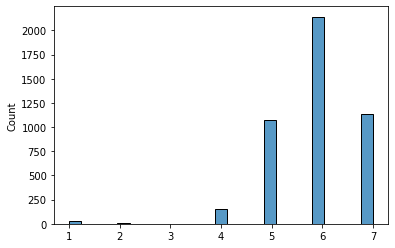

In [75]:
pred = np.argmax(pred, axis=1)
sns.histplot(pred)

# data engineering

## resampling

On va essayer de remettre les target balanced

In [76]:
df_target_un = df_clean

In [77]:
df0= df_target_un[df_target_un['nerdy']==0].sample(frac=1)
df1= df_target_un[df_target_un['nerdy']==1].sample(frac=1)
df2= df_target_un[df_target_un['nerdy']==2].sample(frac=1)
df3= df_target_un[df_target_un['nerdy']==3].sample(frac=1)
df4= df_target_un[df_target_un['nerdy']==4].sample(frac=1)
df5= df_target_un[df_target_un['nerdy']==5].sample(frac=1)
df6= df_target_un[df_target_un['nerdy']==6].sample(frac=1)
df7= df_target_un[df_target_un['nerdy']==7].sample(frac=1)

In [78]:
print(df0.shape)
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)


(270, 49)
(304, 49)
(386, 49)
(504, 49)
(1802, 49)
(3511, 49)
(4460, 49)
(3896, 49)


Je pars sur : elever à 1000 rows avedc le smote les nerdy ranké de 0 à 4.\
diminué à 2000 les nerdy ranké de 5 à 7

In [79]:
df5 = df5.iloc[:2300, :]
print(df5.shape)
df6 = df6.iloc[:2300, :]
print(df6.shape)
df7 = df7.iloc[:2300, :]
print(df7.shape)

(2300, 49)
(2300, 49)
(2300, 49)


In [80]:
df_lowsample = pd.concat([df5, df6, df7])
df_lowsample.shape

(6900, 49)

In [81]:
df_oversample = pd.concat([df0,df1,df2,df3])
X_oversample = df_oversample.drop(columns='nerdy')
y_oversample = df_oversample['nerdy']
sm = SVMSMOTE(sampling_strategy={0:600,1:600, 2:600, 3:1000}, random_state=42)
X_res, y_res = sm.fit_resample(X_oversample, y_oversample)

/Users/maximedupouy/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (600) in class 0 will be larger than the number of samples in the majority class (class #3 -> 504)
  warnings.warn(
/Users/maximedupouy/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (600) in class 1 will be larger than the number of samples in the majority class (class #3 -> 504)
  warnings.warn(
/Users/maximedupouy/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (600) in class 2 will be larger than the number of samples in the majority class (class #3 -> 504)
  warnings.warn(
/Users/maximedupouy/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning:

In [82]:
X_res.shape

(2800, 48)

In [86]:
df_oversample = pd.concat([X_res, y_res], axis=1)
df_oversample.shape

(2800, 49)

In [134]:
df_resample = pd.concat([df_oversample, df4, df_lowsample])
df_resample = df_resample.sample(frac=1)
print(df_resample.shape)
print(df_resample['nerdy'].value_counts())
df_resample.head()

(11502, 49)
6    2300
7    2300
5    2300
4    1802
3    1000
0     600
2     600
1     600
Name: nerdy, dtype: int64


,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q9,Q11,Q12,...,age,screenw,screenh,religion,orientation,familysize,race_arab,race_nativeam,race_nativeau,nerdy
2026,5.000000,5.000000,5.000000,5.0,3.000000,3.000000,5.00000,3.000000,5.000000,3.000000,...,19.000000,1600,900,1.000000,1.0,3.000000,0,0,0,6
13582,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.00000,5.000000,3.000000,5.000000,...,22.000000,414,736,1.000000,1.0,3.000000,0,0,0,7
2318,4.181985,2.818015,4.181985,5.0,2.181985,2.545956,4.63603,2.181985,2.545956,3.181985,...,20.545956,360,640,1.181985,2.0,1.181985,0,0,0,3
11745,3.000000,5.000000,5.000000,2.0,4.000000,5.000000,5.00000,5.000000,4.000000,3.000000,...,15.000000,1366,768,2.000000,1.0,9.000000,0,0,0,7
9823,5.000000,5.000000,3.000000,4.0,5.000000,5.000000,4.00000,5.000000,5.000000,5.000000,...,22.000000,1280,720,2.000000,1.0,3.000000,0,0,0,6


In [136]:
X_resample = df_resample.drop(columns='nerdy')
X_resample = scaler.transform(X_resample)
y_resample = df_resample['nerdy']
y_resample = to_categorical(y_resample)
X_train_resample, X_test_resample, y_train_resample, y_test_resample = train_test_split(X_resample, y_resample, test_size=0.3, random_state=0)

In [137]:
X_train_resample

array([[ 0.94143468,  0.79931488,  0.75716611, ..., -0.13879175,
        -0.20441903, -0.06256216],
       [-0.894617  ,  0.79931488, -1.2077079 , ..., -0.13879175,
        -0.20441903, -0.06256216],
       [-0.55886558,  0.79931488, -0.2252709 , ..., -0.13879175,
        -0.20441903, -0.06256216],
       ...,
       [ 0.94143468,  0.79931488, -0.2252709 , ..., -0.13879175,
        -0.20441903, -0.06256216],
       [ 0.02340884,  0.79931488,  0.75716611, ..., -0.13879175,
        -0.20441903, -0.06256216],
       [-0.894617  , -1.76647113, -2.1901449 , ..., -0.13879175,
        -0.20441903, -0.06256216]])

In [138]:
model_resample = Sequential()
model_resample.add(layers.Dense(2000,input_dim=48, activation="relu"))
model_resample.add(layers.Dense(1000, activation="relu"))
model_resample.add(layers.Dense(8, activation="softmax"))
model_resample.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 2000)              98000     
_________________________________________________________________
dense_57 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dense_58 (Dense)             (None, 8)                 8008      
Total params: 2,107,008
Trainable params: 2,107,008
Non-trainable params: 0
_________________________________________________________________


In [139]:
model_resample.compile(optimizer='adam', loss='categorical_crossentropy',metrics=[RootMeanSquaredError()])
es = EarlyStopping(restore_best_weights=True, patience=5)
model_resample.fit(X_train_resample,y_train_resample,batch_size=16,epochs=1000, validation_split=0.3, callbacks=[es])

Epoch 1/1000
353/353 [==============================] - 2s 6ms/step - loss: 1.6869 - root_mean_squared_error: 0.3111 - val_loss: 1.6229 - val_root_mean_squared_error: 0.3063
Epoch 2/1000
353/353 [==============================] - 2s 5ms/step - loss: 1.5494 - root_mean_squared_error: 0.3024 - val_loss: 1.6135 - val_root_mean_squared_error: 0.3051
Epoch 3/1000
353/353 [==============================] - 2s 5ms/step - loss: 1.4507 - root_mean_squared_error: 0.2951 - val_loss: 1.5767 - val_root_mean_squared_error: 0.3022
Epoch 4/1000
353/353 [==============================] - 2s 5ms/step - loss: 1.3268 - root_mean_squared_error: 0.2853 - val_loss: 1.5985 - val_root_mean_squared_error: 0.3037
Epoch 5/1000
353/353 [==============================] - 2s 5ms/step - loss: 1.1839 - root_mean_squared_error: 0.2726 - val_loss: 1.6903 - val_root_mean_squared_error: 0.3069
Epoch 6/1000
353/353 [==============================] - 2s 5ms/step - loss: 0.9930 - root_mean_squared_error: 0.2522 - val_loss: 1

In [140]:
model_resample.evaluate(X_test_resample, y_test_resample)

108/108 [==============================] - 0s 4ms/step - loss: 1.5679 - root_mean_squared_error: 0.3026


[1.5678958892822266, 0.3025815486907959]

<AxesSubplot:ylabel='Count'>

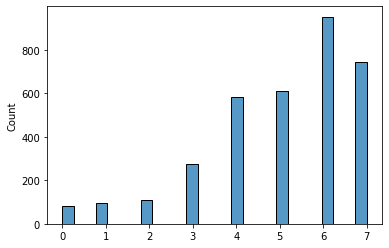

In [141]:
azerty_ = model_resample.predict(X_test_resample)
sns.histplot(np.argmax(azerty_, axis=1))

## resampling + PCA

In [264]:
y_resample = df_resample['nerdy']
y_resample = to_categorical(y_resample)

In [265]:
X_resample = df_resample.drop(columns='nerdy')
scaler_resample_pca = StandardScaler()
scaler_resample_pca.fit(X_resample)
X_resample = scaler_resample_pca.transform(X_resample)

In [266]:
pca_ = PCA()
pca_.fit(X_resample)
X_resample_pca = pca_.transform(X_resample)

X_train_resample_pca, X_test_resample_pca, y_train_resample_pca, y_test_resample_pca = train_test_split(X_resample_pca, y_resample, test_size=0.3, random_state=0)

In [303]:
model_resample_pca = Sequential()
model_resample_pca.add(layers.Dense(100,input_dim=48, activation="relu"))
model_resample_pca.add(layers.Dense(50, activation="relu"))
model_resample_pca.add(layers.Dense(8, activation="softmax"))
model_resample_pca.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 100)               4900      
_________________________________________________________________
dense_94 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_95 (Dense)             (None, 8)                 408       
Total params: 10,358
Trainable params: 10,358
Non-trainable params: 0
_________________________________________________________________


In [304]:
model_resample_pca.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['Precision', 'Recall'])
es = EarlyStopping(restore_best_weights=True, patience=5)
model_resample_pca.fit(X_train_resample_pca,y_train_resample_pca,batch_size=32,epochs=1000, validation_split=0.3, callbacks=[es])

Epoch 1/1000
177/177 [==============================] - 1s 2ms/step - loss: 1.7786 - precision: 0.6019 - recall: 0.0456 - val_loss: 1.6581 - val_precision: 0.7476 - val_recall: 0.0650
Epoch 2/1000
177/177 [==============================] - 0s 796us/step - loss: 1.6001 - precision: 0.6208 - recall: 0.0793 - val_loss: 1.6171 - val_precision: 0.6985 - val_recall: 0.0786
Epoch 3/1000
177/177 [==============================] - 0s 758us/step - loss: 1.5361 - precision: 0.6608 - recall: 0.0937 - val_loss: 1.5938 - val_precision: 0.6554 - val_recall: 0.0882
Epoch 4/1000
177/177 [==============================] - 0s 796us/step - loss: 1.4859 - precision: 0.6701 - recall: 0.1139 - val_loss: 1.5901 - val_precision: 0.6448 - val_recall: 0.0977
Epoch 5/1000
177/177 [==============================] - 0s 756us/step - loss: 1.4497 - precision: 0.6781 - recall: 0.1301 - val_loss: 1.5886 - val_precision: 0.5889 - val_recall: 0.1316
Epoch 6/1000
177/177 [==============================] - 0s 808us/step - 

108/108 [==============================] - 0s 475us/step - loss: 1.5821 - precision: 0.6158 - recall: 0.1217
[1.5820761919021606, 0.6158357858657837, 0.1217038556933403]


<AxesSubplot:ylabel='Count'>

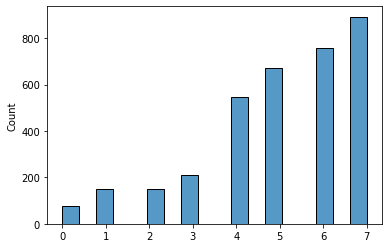

In [305]:
print(model_resample_pca.evaluate(X_test_resample_pca, y_test_resample_pca))
y_pred_resample_pca = model_resample_pca.predict(X_test_resample)
sns.histplot(np.argmax(y_pred_resample_pca, axis=1))

In [306]:
mean_squared_error(np.argmax(y_test_resample_pca, axis=1), np.argmax(y_pred_resample_pca, axis=1))

4.533468559837728

<AxesSubplot:ylabel='Count'>

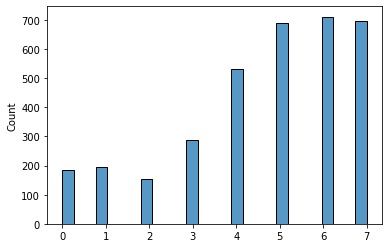

In [307]:
sns.histplot(np.argmax(y_test_resample_pca, axis=1))

# PCA

In [153]:
X_clean

array([[ 0.02340884,  0.79931488,  0.75716611, ..., -0.13879175,
        -0.20441903, -0.06256216],
       [ 0.02340884, -0.91120913, -1.2077079 , ..., -0.13879175,
        -0.20441903, -0.06256216],
       [ 0.94143468,  0.79931488,  0.75716611, ..., -0.13879175,
        -0.20441903, -0.06256216],
       ...,
       [ 0.02340884, -0.01350334, -2.1901449 , ..., -0.13879175,
        -0.20441903, -0.06256216],
       [ 0.02340884, -0.05594712,  0.75716611, ..., -0.13879175,
        -0.20441903, -0.06256216],
       [ 0.94143468, -0.05594712, -0.2252709 , ..., -0.13879175,
        -0.20441903, -0.06256216]])

In [154]:
pca = PCA()
pca.fit(X_clean)
X_pca = pca.fit_transform(X_clean)


In [155]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_clean, test_size=0.3, random_state=0)

In [156]:
y_train_pca=to_categorical(y_train_pca)

In [157]:
model_pca = Sequential()
model_pca.add(layers.Dense(5000,input_dim=48, activation="relu"))
model_pca.add(layers.Dense(1000, activation="relu"))
model_pca.add(layers.Dropout(rate=0.1))
model_pca.add(layers.Dense(250, activation="relu"))
model_pca.add(layers.Dropout(rate=0.1))
model_pca.add(layers.Dense(8, activation="softmax"))
model_pca.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 5000)              245000    
_________________________________________________________________
dense_63 (Dense)             (None, 1000)              5001000   
_________________________________________________________________
dropout_18 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_64 (Dense)             (None, 250)               250250    
_________________________________________________________________
dropout_19 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 8)                 2008      
Total params: 5,498,258
Trainable params: 5,498,258
Non-trainable params: 0
___________________________________________

In [158]:
model_pca.compile(optimizer='adam', loss='categorical_crossentropy',metrics=[RootMeanSquaredError()])
es = EarlyStopping(restore_best_weights=True, patience=10)
model_pca.fit(X_train_pca,y_train_pca,batch_size=8,epochs=1000, validation_split=0.3, callbacks=[es])

Epoch 1/1000
927/927 [==============================] - 10s 11ms/step - loss: 1.5592 - root_mean_squared_error: 0.3043 - val_loss: 1.5179 - val_root_mean_squared_error: 0.3002
Epoch 2/1000
927/927 [==============================] - 10s 11ms/step - loss: 1.4878 - root_mean_squared_error: 0.2990 - val_loss: 1.4891 - val_root_mean_squared_error: 0.2982
Epoch 3/1000
927/927 [==============================] - 10s 11ms/step - loss: 1.4427 - root_mean_squared_error: 0.2964 - val_loss: 1.4737 - val_root_mean_squared_error: 0.2973
Epoch 4/1000
927/927 [==============================] - 10s 11ms/step - loss: 1.4095 - root_mean_squared_error: 0.2944 - val_loss: 1.4735 - val_root_mean_squared_error: 0.2971
Epoch 5/1000
927/927 [==============================] - 10s 11ms/step - loss: 1.3763 - root_mean_squared_error: 0.2919 - val_loss: 1.5101 - val_root_mean_squared_error: 0.2996
Epoch 6/1000
927/927 [==============================] - 11s 12ms/step - loss: 1.3179 - root_mean_squared_error: 0.2877 -

KeyboardInterrupt: 

In [130]:
y_test_pca= to_categorical(y_test_pca)
model_pca.evaluate(X_test_pca, y_test_pca)

142/142 [==============================] - 1s 10ms/step - loss: 1.5054 - root_mean_squared_error: 0.2991


[1.505445957183838, 0.29910773038864136]

<AxesSubplot:ylabel='Count'>

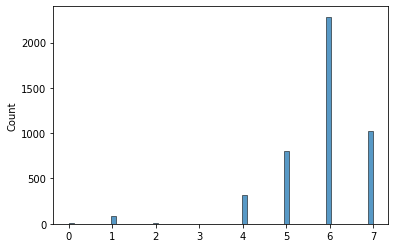

In [131]:
azerty = model_pca.predict(X_test_pca)
sns.histplot(np.argmax(azerty, axis=1))

# test kaggle challenge

## load data

In [216]:
path_test = '../data/IITG.AI HACKATHON 1 2021-22/test.csv'
df_test = pd.read_csv(path_test)

/Users/maximedupouy/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [217]:
index = df_test["id"]

In [218]:
df_test.head(20)

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,familysize,major,race_arab,race_asian,race_black,race_white,race_hispanic,race_nativeam,race_nativeau,race_other
0,869598,3,5,4,3,5,5,5,4,4,...,2,mechatronics engineering,0,0,0,1,1,0,0,0
1,682098,4,5,5,4,5,3,5,4,4,...,2,Education,0,0,0,1,0,0,0,0
2,278454,3,2,5,2,3,3,2,5,4,...,3,NaN,0,0,0,1,0,0,0,0
3,119007,0,5,5,4,3,5,5,1,5,...,3,chemical engineering,0,0,0,1,0,0,0,0
4,49950,5,5,5,4,5,4,5,5,5,...,3,computer science,0,0,0,1,0,0,0,1
5,984812,3,5,5,3,2,3,5,2,3,...,5,NaN,0,0,0,1,0,0,0,0
6,927608,4,4,5,4,3,5,5,5,5,...,1,biochemistry,0,0,0,1,0,0,0,0
7,481675,4,4,5,4,3,5,3,3,5,...,2,Animation,0,1,0,0,0,0,0,0
8,77421,4,2,5,4,5,3,4,5,5,...,2,NaN,0,0,0,1,0,0,0,0
9,862801,5,3,5,3,3,5,4,5,3,...,2,Not out of high school,0,0,0,1,1,0,0,0


## preprocess

In [219]:
df_test = df_test.drop(columns=['country','introelapse', 'testelapse', 'surveyelapse'])

In [220]:
for column in columns_race:
    df_test[column] = df_test[column].apply(del_word)
for column in tipi_columns[:-1]:
    df_test[column] = df_test[column].replace(0, df_test[column].mean())
for col in col__ :
    df_test[col] = df_test[col].apply(lambda x : max_value(x, col))
    df_test[col] = df_test[col].replace(0, df_test[col].mean())
df_test['age'] = df_test['age'].apply(set_age)
df_test = df_test[garbage[:-1]]

df_test.head(5)

,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q9,Q11,Q12,...,engnat,age,screenw,screenh,religion,orientation,familysize,race_arab,race_nativeam,race_nativeau
0,3,5,4,3,5,5,4,4,5,5,...,2.0,23.0,1024,600,4.0,1.0,2.0,0,0,0
1,4,5,5,4,5,3,4,4,1,5,...,2.0,24.0,1920,1080,4.0,5.0,2.0,0,0,0
2,3,2,5,2,3,3,5,4,2,1,...,1.0,14.0,360,640,1.0,5.0,3.0,0,0,0
3,0,5,5,4,3,5,1,5,1,3,...,1.0,65.0,1920,1080,9.0,1.0,3.0,0,0,0
4,5,5,5,4,5,4,5,5,4,5,...,2.0,29.0,360,592,2.0,2.0,3.0,0,0,0


In [221]:
X_test_clean=scaler_resample_pca.transform(df_test)
X_test_clean

array([[-0.68476993,  0.85383129, -0.10730387, ..., -0.13437371,
        -0.20155013, -0.05680857],
       [ 0.14386944,  0.85383129,  0.80438167, ..., -0.13437371,
        -0.20155013, -0.05680857],
       [-0.68476993, -1.50865752,  0.80438167, ..., -0.13437371,
        -0.20155013, -0.05680857],
       ...,
       [ 0.9725088 ,  0.06633502,  0.80438167, ..., -0.13437371,
        -0.20155013, -0.05680857],
       [ 0.14386944, -1.50865752, -0.10730387, ..., -0.13437371,
        -0.20155013, -0.05680857],
       [ 0.14386944,  0.06633502,  0.80438167, ..., -0.13437371,
        -0.20155013, -0.05680857]])

In [222]:
X_test_clean_pca = pca_.transform(X_test_clean)
X_test_clean_pca

array([[-2.42583739,  0.32652812,  0.03122431, ..., -0.15862401,
        -0.49416934, -0.5651513 ],
       [-0.43059009,  1.10700321, -0.82503019, ..., -0.52599914,
         0.23181242,  0.08367442],
       [ 1.19046083,  3.90789698,  1.57454083, ...,  0.19026509,
         0.71426125,  0.23633852],
       ...,
       [ 0.1019645 ,  3.42277092, -1.74448835, ...,  0.10974442,
         0.31856678, -0.30190837],
       [-0.02003808, -0.75113353,  0.86505924, ..., -0.56052254,
         0.17556824,  0.26364802],
       [-1.78122216, -0.2858139 ,  2.2729307 , ...,  0.0498299 ,
        -0.09524576,  0.52946246]])

In [223]:
prediction_1 = model_resample_pca.predict(X_test_clean_pca)
prediction_1 = np.argmax(prediction_1, axis=1)

In [224]:
prediction_1 = pd.DataFrame(prediction_1, columns=['nerdy'])
prediction_1 = pd.concat([index, prediction_1], axis=1)

In [225]:
prediction_1.head(5)

,id,nerdy
0,869598,6
1,682098,5
2,278454,4
3,119007,6
4,49950,7


<AxesSubplot:xlabel='nerdy', ylabel='Count'>

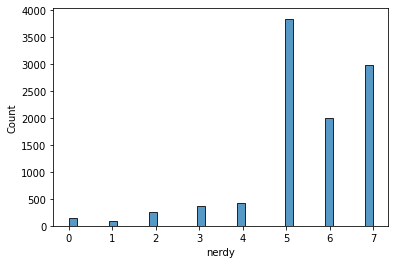

In [226]:
sns.histplot(prediction_1['nerdy'])

In [227]:
prediction_1.to_csv('../test_challenge_kaggle/hackaton_1.csv', index=False)

In [240]:
svc = SVC(kernel='linear')
y_train_resample_pca = np.argmax(y_train_resample_pca, axis=1)
model_svc = svc.fit(X_train_resample_pca,y_train_resample_pca)


In [243]:
from sklearn.metrics import mean_squared_error
y_pred_clf = model_svc.predict(X_test_resample_pca)
y_pred_clf

array([5, 5, 1, ..., 6, 5, 6])

In [244]:
mean_squared_error(y_test_resample_pca, y_pred_clf)

4.001448855404231

In [245]:
y_test_resample_pca

array([4, 4, 5, ..., 7, 3, 6])

In [230]:
y_test_resample_pca = np.argmax(y_test_resample_pca, axis=1)
y_test_resample_pca

AxisError: axis 1 is out of bounds for array of dimension 1

In [211]:
y_test_resample_pca

array([4, 4, 5, ..., 7, 3, 6])

<AxesSubplot:ylabel='Count'>

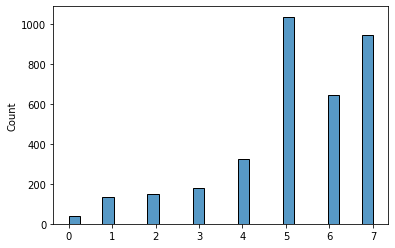

In [246]:
sns.histplot(y_pred_clf)